# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Abdillah Dwi Cahya
- **Email:** dwicahya.abdil69@gmail.com
- **ID Dicoding:** dwi_cahya12

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan *revenue* dalam beberapa bulan terakhir?
- Bagaimana demografi *customer* dan *seller* yang kita miliki?
- Kategori produk apa yang paling banyak terjual dan paling sedikit terjual?
- Kategori produk apa yang memiliki review terbaik dan terjelek?
- Seberapa sering pembelian produk tiap state dalam beberapa tahun terakhir?
- Berapa banyak uang yang dihabiskan tiap state dalam beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

* Memuat file **customers_dataset**

In [2]:
customers_df = pd.read_csv("Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


* Memuat file **sellers_dataset**

In [3]:
sellers_df = pd.read_csv("Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


* Memuat file **orders_dataset**

In [4]:
orders_df = pd.read_csv("Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


* Memuat file **order_items_dataset**

In [5]:
order_items_df = pd.read_csv("Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


* Memuat file **order_payments_dataset**

In [6]:
order_payments_df = pd.read_csv("Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


* Memuat file **order_reviews_dataset**

In [7]:
order_reviews_df = pd.read_csv("Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


* Memuat file **product_category_name_translation**

In [8]:
product_category_trans_df = pd.read_csv("Dataset/product_category_name_translation.csv")
product_category_trans_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


* Memuat file **products_dataset**

In [9]:
products_df = pd.read_csv("Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

Menilai data ***customers_df***

* Periksa tipe data dan parameter statistik tiap kolom

In [10]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


* Periksa duplikasi data

In [12]:
print("Jumlah duplikasi : ", customers_df.duplicated().sum())

Jumlah duplikasi :  0


Menilai data ***sellers_df***

* Periksa tipe data dan parameter statistik tiap kolom

In [13]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [14]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


* Periksa duplikasi data

In [15]:
print("Jumlah duplikasi : ", sellers_df.duplicated().sum())

Jumlah duplikasi :  0


Menilai data ***orders_df***

* Periksa tipe data dan parameter statistik tiap kolom

In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


* Periksa *missing value*

In [18]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

* Periksa duplikasi data

In [19]:
print("Jumlah duplikasi : ", orders_df.duplicated().sum())

Jumlah duplikasi :  0


*Kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date** seharusnya memiliki tipe data **datetime***

Menilai data ***order_items_df***

* Periksa tipe data dan parameter statistik tiap kolom

In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


* Periksa *missing value*

In [22]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

* Periksa duplikasi data *order_id*

In [23]:
print("Jumlah duplikasi 'order_id' : ", order_items_df.duplicated('order_id').sum())

Jumlah duplikasi 'order_id' :  13984


*Didapat data **order_id** duplikat sebanyak **13.984**. Selain itu, kolom **shipping_limit_date** seharusnya memiliki tipe data **datetime***

Menilai data ***order_payments_df***

* Periksa tipe data dan parameter statistik tiap kolom

In [24]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


* Periksa *missing_value*

In [26]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

* Periksa duplikasi data *order_id*

In [27]:
print("Jumlah duplikasi 'order_id' : ", order_payments_df.duplicated('order_id').sum())

Jumlah duplikasi 'order_id' :  4446


*Terdapat **4.446** data **order_id** duplikasi.*

Menilai data ***order_reviews_df***

* Periksa tipe data dan parameter statistik tiap kolom

In [28]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


* Periksa *missing_value*

In [30]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

* Periksa duplikasi data *order_id* dan *review_id*

In [31]:
print("Jumlah duplikasi 'order_id' : ", order_reviews_df.duplicated('order_id').sum())
print("Jumlah duplikasi 'review_id' : ", order_reviews_df.duplicated('review_id').sum())

Jumlah duplikasi 'order_id' :  551
Jumlah duplikasi 'review_id' :  814


*Terdapat **551** data duplikasi pada kolom **order_id** dan **814** data duplikasi pada kolom **review_id**. Selain itu, kolom **review_creation_date** dan **review_answer_timestamp** seharusnya memiliki tipe data **datetime**.*

Menilai data ***product_category_trans_df***

* Periksa tipe data dan parameter statistik tiap kolom

In [32]:
product_category_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [33]:
product_category_trans_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


* Periksa *missing value*

In [34]:
product_category_trans_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

* Periksa duplikasi data

In [35]:
print("Jumlah duplikasi : ", product_category_trans_df.duplicated().sum())

Jumlah duplikasi :  0


Menilai data ***products_df***

* Periksa tipe data dan parameter statistik tiap kolom

In [36]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


* Periksa *missing value*

In [38]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

* Periksa duplikasi data

In [39]:
print("Jumlah duplikasi : ", products_df.duplicated('product_id').sum())

Jumlah duplikasi :  0


*Hampir semua kolom memiliki data missing. Kolom **product_name_lenght**, **product_description_lenght**, dan **product_photos_qty** seharusnya memiliki tipe data **integer**. Terdapat typo pada **product_name_lenght** seharusnya **product_name_length** dan **product_description_lenght** seharusnya **product_description_length***.

### Cleaning Data

Membersihkan data ***orders_df***

* Mengganti tipe data menjadi *datetime*

In [40]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

# Periksa kembali tipe data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Membersihkan data ***order_items_df***

* Menghapus duplikasi data

In [41]:
order_items_df.drop_duplicates(subset='order_id', keep='last', inplace=True)

# Periksa kembali duplikasi data
print("Jumlah duplikasi : ", order_items_df.duplicated('order_id').sum())

Jumlah duplikasi :  0


* Mengubah tipe data menjadi *datetime*

In [42]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

# Periksa kembali
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98666 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             98666 non-null  object        
 1   order_item_id        98666 non-null  int64         
 2   product_id           98666 non-null  object        
 3   seller_id            98666 non-null  object        
 4   shipping_limit_date  98666 non-null  datetime64[ns]
 5   price                98666 non-null  float64       
 6   freight_value        98666 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Membersihkan data ***order_payments_df***

* Menghapus duplikasi data

In [43]:
order_payments_df.drop_duplicates(subset='order_id', inplace=True)

# Periksa kembali duplikasi data
print("Jumlah duplikasi : ", order_payments_df.duplicated('order_id').sum())

Jumlah duplikasi :  0


Membersihkan data ***order_reviews_df***

* Menghapus duplikasi data

In [44]:
order_reviews_df.drop_duplicates(subset='order_id', inplace=True)
order_reviews_df.drop_duplicates(subset='review_id', inplace=True)

# Periksa kembali
print("Jumlah duplikasi 'order_id' : ", order_reviews_df.duplicated("order_id").sum())
print("Jumlah duplikasi 'review_id' : ", order_reviews_df.duplicated("review_id").sum())

Jumlah duplikasi 'order_id' :  0
Jumlah duplikasi 'review_id' :  0


* Mengubah tipe data menjadi *datetime*

In [45]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

# Periksa kembali
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98156 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98156 non-null  object        
 1   order_id                 98156 non-null  object        
 2   review_score             98156 non-null  int64         
 3   review_comment_title     11509 non-null  object        
 4   review_comment_message   40580 non-null  object        
 5   review_creation_date     98156 non-null  datetime64[ns]
 6   review_answer_timestamp  98156 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.0+ MB


Membersihkan data ***products_df***

* Mengganti nama kolom

In [46]:
products_df.rename(columns={
    "product_name_lenght" : "product_name_length",
    "product_description_lenght" : "product_description_length"
}, inplace=True)

* Mengisi *missing value*

***Imputation** missing value* pada kolom **product_weight_g**, **product_length_cm**, **product_height_cm**, dan **product_width_cm** dimana mengisi data yang *missing* dengan mean masing-masing kolom.

In [47]:
imputation_columns = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

for column in imputation_columns:
    products_df[column].fillna(value=products_df[column].mean(), inplace=True)

# Periksa kembali data missing
products_df.isna().sum()

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\2150168786.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df[column].fillna(value=products_df[column].mean(), inplace=True)


product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

***Imputation** missing value pada kolom **product_name_length**, **product_description_length**, dan **product_photos_qty** dengan nilai **0**.*

In [48]:
imputation_columns = ["product_name_length", "product_description_length", "product_photos_qty"]

for column in imputation_columns:
    products_df[column].fillna(value=0, inplace=True)

# Periksa kembali data missing
products_df.isna().sum()

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\2277552119.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df[column].fillna(value=0, inplace=True)


product_id                      0
product_category_name         610
product_name_length             0
product_description_length      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

***Interpolate** missing value* pada kolom **product_category_name** dengan metode **'ffill'**

In [49]:
products_df['product_category_name'].interpolate(method='ffill', inplace=True)

# Periksa kembali
products_df.isna().sum()

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\1738729595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].interpolate(method='ffill', inplace=True)
C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\1738729595.py:1: FutureWarning: Series.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  products_df['product_category_name'].interpolate(method='ffill', inplace=True)


product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

* Mengganti tipe data menjadi *integer*

In [50]:
integer_column = ["product_name_length", "product_description_length", "product_photos_qty"]

for column in integer_column:
    products_df[column] = products_df[column].apply(np.int64)

# Periksa kembali
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  int64  
 3   product_description_length  32951 non-null  int64  
 4   product_photos_qty          32951 non-null  int64  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

### Explore ***customers_df*** dan ***orders_df***

* Menggabungkan DataFrame ***customers_df*** dan ***orders_df*** menjadi ***order_customer_df***

In [51]:
order_customer_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how='right',
    left_on="customer_id",
    right_on="customer_id"
)
order_customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [52]:
# Memeriksa parameter statistik
order_customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441.000000,99441,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,96096,NaN,4119,27,99441,8,NaN,NaN,NaN,NaN,NaN
top,9ef432eb6251297304e76186b10a928d,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,17,NaN,15540,41746,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35137.474583,NaN,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,24416.000000,NaN,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,58900.000000,NaN,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


* Menghitung banyaknya customer tiap *city* dan *state*

In [53]:
order_customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [54]:
order_customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

*Diperoleh jumlah customer terbanyak berada di city **sao paulo** sebanyak **15.540** customer dan state **SP** sebanyak **41.746** customer*

* Menghitung ***delivery_time*** dengan **selisih** antara **order_purchased_timestamp** dan **order_delivered_customer_date**.

In [55]:
delivery_time = (order_customer_df["order_delivered_customer_date"] - order_customer_df["order_purchase_timestamp"]).apply(lambda x : x.total_seconds())
order_customer_df["delivery_time"] = round(delivery_time/86400)

# Periksa parameter statistik
order_customer_df.describe(include='all')

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441.000000,99441,99281,97658,96476,99441,96476.000000
mean,35137.474583,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.517548
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000
25%,11347.000000,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,7.000000
50%,24416.000000,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.000000
75%,58900.000000,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,16.000000
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,210.000000
std,29797.938996,NaN,NaN,NaN,NaN,NaN,9.550516


*Didapat rata-rata pengiriman adalah **12-13 hari** dengan **minimumnya 1 hari** dan **maksimumnya 210 hari***

* Memeriksa kolom **order_status**

In [56]:
order_customer_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

*Terlihat terdapat **625 orderan** yang berstatus **canceled**. Data ini nantinya tidak akan digunakan ketika menghitung performa penjualan dan revenue*.

### Explore ***sellers_df***

* Mengitung banyak seller tiap *city* dan *state*

In [57]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [58]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

*Diperoleh jumlah seller terbanyak berada di city **sao paulo** sebanyak **694** seller dan state **SP** sebanyak **1849** seller*

### Explore ***product_df***

* Menggabungkan DataFrame ***product_category_trans_df*** dan ***products_df*** menjadi ***product_category_df***

In [59]:
product_category_df = pd.merge(
    left=product_category_trans_df,
    right=products_df,
    how='right',
    left_on="product_category_name",
    right_on="product_category_name",
)
product_category_df.head()

,product_category_name,product_category_name_english,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,perfumery,1e9e8ef04dbcff4541ed26657ea517e5,40,287,1,225.0,16.0,10.0,14.0
1,artes,art,3aa071139cb16b67ca9e5dea641aaa2f,44,276,1,1000.0,30.0,18.0,20.0
2,esporte_lazer,sports_leisure,96bd76ec8810374ed1b65e291975717f,46,250,1,154.0,18.0,9.0,15.0
3,bebes,baby,cef67bcfe19066a932b7673e239eb23d,27,261,1,371.0,26.0,4.0,26.0
4,utilidades_domesticas,housewares,9dc1a7de274444849c219cff195d0b71,37,402,4,625.0,20.0,17.0,13.0


In [60]:
# Periksa missing value
product_category_df.isna().sum()

product_category_name             0
product_category_name_english    13
product_id                        0
product_name_length               0
product_description_length        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
dtype: int64

Terdapat data *missing* pada **product_category_name_english**. Sehingga, data yang kosong akan diisi dengan **product_category_name** di baris yang sama.

In [61]:
product_category_df["product_category_name_english"].fillna(value=product_category_df["product_category_name"], inplace=True)

# Periksa kembali
product_category_df.isna().sum()

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\3973790244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_category_df["product_category_name_english"].fillna(value=product_category_df["product_category_name"], inplace=True)


product_category_name            0
product_category_name_english    0
product_id                       0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

* Menghapus kolom **product_category_name** dan *rename* **product_category_name_english** menjadi **product_category_name**

In [62]:
# Menghapus kolom 'product_category_name'
product_category_df.drop(["product_category_name"], axis=1, inplace=True)

In [63]:
# Rename kolom 'product_category_name_english' menjadi 'product_category_name'
product_category_df.rename(columns={
    "product_category_name_english" : "product_category_name"
}, inplace=True)
product_category_df.head()

,product_category_name,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumery,1e9e8ef04dbcff4541ed26657ea517e5,40,287,1,225.0,16.0,10.0,14.0
1,art,3aa071139cb16b67ca9e5dea641aaa2f,44,276,1,1000.0,30.0,18.0,20.0
2,sports_leisure,96bd76ec8810374ed1b65e291975717f,46,250,1,154.0,18.0,9.0,15.0
3,baby,cef67bcfe19066a932b7673e239eb23d,27,261,1,371.0,26.0,4.0,26.0
4,housewares,9dc1a7de274444849c219cff195d0b71,37,402,4,625.0,20.0,17.0,13.0


### Explore ***order_items_df***, ***order_payments_df***, dan ***order_reviews_df***

* Menggabungkan DataFrame ketiganya menjadi ***all_orders_df***

In [64]:
all_orders_df = order_items_df.merge(order_payments_df, how='left', on="order_id").merge(order_reviews_df, how='left', on="order_id")

# Rename nama kolom
all_orders_df.rename(columns={
    "order_item_id" : "quantity",
    "payment_value" : "total_price"
}, inplace=True)

all_orders_df.head()

,order_id,quantity,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,total_price,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [65]:
# Periksa parameter statistik
all_orders_df.describe(include="all")

,order_id,quantity,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,total_price,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,98666,98666.000000,98666,98666,98666,98666.000000,98666.000000,98665.000000,98665,98665.000000,98665.000000,97431,97431.000000,11434,40076,97431,97431
unique,98666,NaN,31862,3084,NaN,NaN,NaN,NaN,4,NaN,NaN,97431,NaN,4492,35605,NaN,NaN
top,00010242fe8c5a6d1ba2dd792cb16214,NaN,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,97ca439bc427b48bc1cd7177abe71365,NaN,Recomendo,Muito bom,NaN,NaN
freq,1,NaN,443,1835,NaN,NaN,NaN,NaN,74883,NaN,NaN,1,NaN,421,229,NaN,NaN
mean,NaN,1.141731,NaN,NaN,2018-01-07 12:46:40.387509248,125.883144,20.179411,1.022845,NaN,2.917083,157.959931,NaN,4.106783,NaN,NaN,2018-01-13 22:30:57.548418560,2018-01-17 01:54:25.995935744
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,1.000000,NaN,0.000000,0.010000,NaN,1.000000,NaN,NaN,2016-10-06 00:00:00,2016-10-07 18:32:28
25%,NaN,1.000000,NaN,NaN,2017-09-20 02:55:30,41.492500,13.280000,1.000000,NaN,1.000000,60.010000,NaN,4.000000,NaN,NaN,2017-09-26 00:00:00,2017-09-28 11:41:08
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:52:23.500000,79.000000,16.350000,1.000000,NaN,2.000000,103.330000,NaN,5.000000,NaN,NaN,2018-02-03 00:00:00,2018-02-06 04:47:34
75%,NaN,1.000000,NaN,NaN,2018-05-10 15:10:40.249999872,139.900000,21.220000,1.000000,NaN,4.000000,175.080000,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 16:03:31.500000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,27.000000,NaN,24.000000,13664.080000,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [66]:
# Periksa missing value
all_orders_df.isna().sum()

order_id                       0
quantity                       0
product_id                     0
seller_id                      0
shipping_limit_date            0
price                          0
freight_value                  0
payment_sequential             1
payment_type                   1
payment_installments           1
total_price                    1
review_id                   1235
review_score                1235
review_comment_title       87232
review_comment_message     58590
review_creation_date        1235
review_answer_timestamp     1235
dtype: int64

Terdapat *missing value* pada **payment_sequential**, **payment_type**, **payment_installments**, dan **total_price**.

Pada **payment_sequential**, **payment_installments**, dan **total_price**, data missing diisi dengan mean masing-masing kolom. Sedangkan **payment_type** akan diisi dengan data yang sering muncul

In [67]:
all_orders_df["payment_sequential"].fillna(value=all_orders_df["payment_sequential"].mean(), inplace=True)
all_orders_df["payment_type"].fillna(value="credit_card", inplace=True)
all_orders_df["payment_installments"].fillna(value=all_orders_df["payment_installments"].mean(), inplace=True)
all_orders_df["total_price"].fillna(value=all_orders_df["total_price"].mean(), inplace=True)

# Periksa kembali
all_orders_df.isna().sum()

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\3035453815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_orders_df["payment_sequential"].fillna(value=all_orders_df["payment_sequential"].mean(), inplace=True)
C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\3035453815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

order_id                       0
quantity                       0
product_id                     0
seller_id                      0
shipping_limit_date            0
price                          0
freight_value                  0
payment_sequential             0
payment_type                   0
payment_installments           0
total_price                    0
review_id                   1235
review_score                1235
review_comment_title       87232
review_comment_message     58590
review_creation_date        1235
review_answer_timestamp     1235
dtype: int64

* Menggabungkan DataFrame ***product_category_df***, ***sellers_df***, dan ***all_orders_df*** menjadi ***product_descriptions_df***

In [68]:
product_descriptions_df = pd.merge(
    left=product_category_df,
    right=pd.merge(
        left=sellers_df,
        right=all_orders_df,
        how='right',
        left_on="seller_id",
        right_on="seller_id"
    ),
    how='right',
    left_on="product_id",
    right_on="product_id"
)

product_descriptions_df.head()

,product_category_name,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,...,payment_sequential,payment_type,payment_installments,total_price,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,58,598,4,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,...,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,pet_shop,e5f2d52b802189ee658865ca93d83a8f,56,239,2,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,...,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13,2017-05-15 11:34:13
2,furniture_decor,c777355d18b72b67abbeef9df44fd0fd,59,695,2,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,...,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,perfumery,7634da152a4610f1595efa32f14722fc,42,480,1,200.0,16.0,10.0,15.0,9d7a1d34a5052409006425275ba1c2b4,...,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15,2018-08-15 16:39:01
4,garden_tools,ac6c3623068f30de03045865e4e10089,59,409,1,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,...,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [69]:
# Periksa parameter statistik
product_descriptions_df.describe(include="all")

,product_category_name,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,...,payment_sequential,payment_type,payment_installments,total_price,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,98666,98666,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666,...,98666.000000,98666,98666.000000,98666.000000,97431,97431.000000,11434,40076,97431,97431
unique,73,31862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3084,...,NaN,4,NaN,NaN,97431,NaN,4492,35605,NaN,NaN
top,bed_bath_table,99a4788cb24856965c36a24e339b6058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6560211a19b47992c3666cc44a7e94c0,...,NaN,credit_card,NaN,NaN,97ca439bc427b48bc1cd7177abe71365,NaN,Recomendo,Muito bom,NaN,NaN
freq,9436,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1835,...,NaN,74884,NaN,NaN,1,NaN,421,229,NaN,NaN
mean,NaN,NaN,48.139653,782.506831,2.216782,2103.550590,30.092677,16.481392,23.017535,NaN,...,1.022845,NaN,2.917083,157.959931,NaN,4.106783,NaN,NaN,2018-01-13 22:30:57.548418560,2018-01-17 01:54:25.995935744
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,6.000000,NaN,...,1.000000,NaN,0.000000,0.010000,NaN,1.000000,NaN,NaN,2016-10-06 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,42.000000,341.250000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,...,1.000000,NaN,1.000000,60.010000,NaN,4.000000,NaN,NaN,2017-09-26 00:00:00,2017-09-28 11:41:08
50%,NaN,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,...,1.000000,NaN,2.000000,103.330000,NaN,5.000000,NaN,NaN,2018-02-03 00:00:00,2018-02-06 04:47:34
75%,NaN,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,...,1.000000,NaN,4.000000,175.080000,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 16:03:31.500000
max,NaN,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,NaN,...,27.000000,NaN,24.000000,13664.080000,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


* Memeriksa kategori produk yang mendapatkan review terbagus dan terjelek

In [70]:
product_descriptions_df.groupby(by="product_category_name").agg({
    "review_score" : "mean"
}).sort_values(by="review_score", ascending=False)

,review_score
product_category_name,
cds_dvds_musicals,4.666667
flowers,4.538462
books_general_interest,4.464567
costruction_tools_tools,4.437500
books_technical,4.421260
...,...
fashion_male_clothing,3.738739
office_furniture,3.630867
portateis_cozinha_e_preparadores_de_alimentos,3.428571


*Terlihat bahwa kategori produk dengan **review terbagus** adalah **cds_dvds_musicals** dan **review terjelek** adalah **security_and_services***

### Explore ***all_df***

* Menggabungkan semua DataFrames menjadi satu dalam DataFrames ***all_df***

In [91]:
all_df = pd.merge(
    left = order_customer_df,
    right = product_descriptions_df,
    how = 'left',
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

In [72]:
# Memeriksa parameter statistik
all_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,total_price,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99441,99441,99441.000000,99441,99441,99441,99441,99441,99281,97658,...,98666.000000,98666,98666.000000,98666.000000,97431,97431.000000,11434,40076,97431,97431
unique,99441,96096,NaN,4119,27,99441,8,NaN,NaN,NaN,...,NaN,4,NaN,NaN,97431,NaN,4492,35605,NaN,NaN
top,9ef432eb6251297304e76186b10a928d,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,NaN,NaN,NaN,...,NaN,credit_card,NaN,NaN,a54f0611adc9ed256b57ede6b6eb5114,NaN,Recomendo,Muito bom,NaN,NaN
freq,1,17,NaN,15540,41746,1,96478,NaN,NaN,NaN,...,NaN,74884,NaN,NaN,1,NaN,421,229,NaN,NaN
mean,NaN,NaN,35137.474583,NaN,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,...,1.022845,NaN,2.917083,157.959931,NaN,4.106783,NaN,NaN,2018-01-13 22:30:57.548419072,2018-01-17 01:54:25.995935744
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,...,1.000000,NaN,0.000000,0.010000,NaN,1.000000,NaN,NaN,2016-10-06 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,...,1.000000,NaN,1.000000,60.010000,NaN,4.000000,NaN,NaN,2017-09-26 00:00:00,2017-09-28 11:41:08
50%,NaN,NaN,24416.000000,NaN,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,...,1.000000,NaN,2.000000,103.330000,NaN,5.000000,NaN,NaN,2018-02-03 00:00:00,2018-02-06 04:47:34
75%,NaN,NaN,58900.000000,NaN,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,...,1.000000,NaN,4.000000,175.080000,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 16:03:31.500000
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,...,27.000000,NaN,24.000000,13664.080000,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [73]:
# Memeriksa missing value
all_df.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
order_estimated_delivery_date        0
delivery_time                     2965
product_category_name              775
product_id                         775
product_name_length                775
product_description_length         775
product_photos_qty                 775
product_weight_g                   775
product_length_cm                  775
product_height_cm                  775
product_width_cm                   775
seller_id                          775
seller_zip_code_prefix             775
seller_city                        775
seller_state             

Terdapat data *missing* pada beberapa kolom. Hal ini kemungkinan mengartikan bahwa **stok produk kosong**. Selanjutnya akan diperiksa 'order_status' yang tidak memiliki 'product_id'

In [74]:
all_df[all_df["product_id"].isna()].groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_id, dtype: int64

Terdapat beberapa 'order_status' yang tidak memiliki 'product_id', dengan didominasi status **unavailable** sebanyak **603 orderan**. Data analis mengansumsikan hal ini dimungkinkan karena **kesalahan sistem** yang menyebabkan **order dapat dibuat sementara stok produk habis**.

* Memeriksa kategori produk yang terjual paling banyak dan paling sedikit

In [90]:
all_df.query("order_status != 'canceled'").groupby(by="product_category_name").agg({
    "order_id" : "nunique",
    "quantity" : "sum",
    "total_price" : "sum"
}).sort_values(by="quantity", ascending=False)

,order_id,quantity,total_price
product_category_name,,,
bed_bath_table,9417,11247.0,1.238802e+06
health_beauty,8900,9787.0,1.441066e+06
sports_leisure,7722,8689.0,1.142594e+06
furniture_decor,6437,8401.0,9.024115e+05
computers_accessories,6651,7807.0,1.041473e+06
...,...,...,...
portateis_cozinha_e_preparadores_de_alimentos,13,14.0,4.228050e+03
la_cuisine,12,14.0,2.079870e+03
pc_gamer,7,9.0,1.391670e+03


*Diperoleh kategori produk dengan **penjualan tertinggi** adalah **bed_bath_table** dengan terjual **11.247 produk** dan total revenue **1.238.802**. Sedangkan kategori produk dengan **penjualan terendah** adalah **security_and_services** dengan terjual **2 produk** dan total revenue **324***.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan *revenue* dalam beberapa bulan terakhir?

* Membuat DataFrame untuk penjualan per bulan

In [76]:
monthly_orders_df = all_df.query("order_status != 'canceled'").resample(rule='M', on="order_purchase_timestamp").agg({
    "order_id" : "nunique",
    "total_price" : "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id" : "order_count",
    "total_price" : "revenue"
}, inplace=True)
monthly_orders_df.sort_values("order_purchase_timestamp", ascending=False)[:13]

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\3413654937.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.query("order_status != 'canceled'").resample(rule='M', on="order_purchase_timestamp").agg({


,order_purchase_timestamp,order_count,revenue
24,2018-09,1,166.46
23,2018-08,6428,983759.48
22,2018-07,6251,1025348.01
21,2018-06,6149,998705.82
20,2018-05,6849,1132074.72
19,2018-04,6924,1141772.49
18,2018-03,7185,1134357.02
17,2018-02,6655,967626.53
16,2018-01,7235,1084715.45
15,2017-12,5662,847561.79


* Visualisasi data dengan **line chart**

Data yang akan divisualisasikan adalah penjualan pada **satu tahun terakhir (September 2017 - Agustus 2018)**.

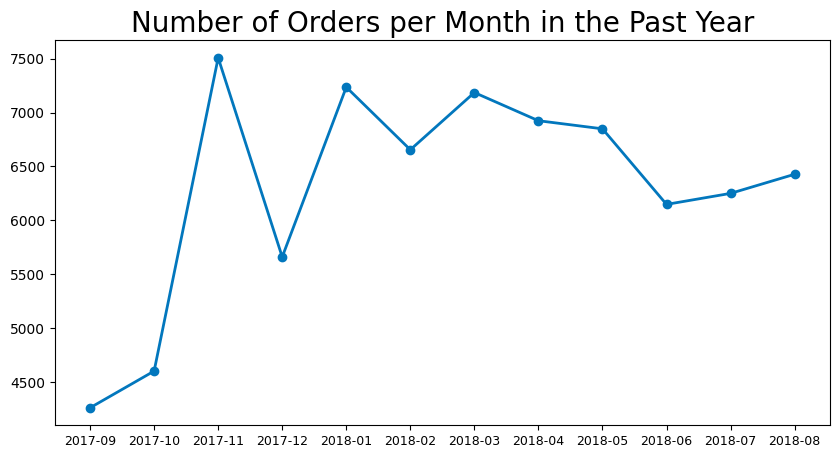

In [77]:
# Visualisasi data performa penjualan
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"][-13:-1],
    monthly_orders_df["order_count"][-13:-1],
    marker='o',
    linewidth=2,
    color="#0277BD"
)
plt.title("Number of Orders per Month in the Past Year", fontsize=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.show()

*Terlihat bahwa **puncak performa penjualan** berada di bulan **November 2017**. Selain itu, **performa mengalami penurunan** pada bulan **Desember 2017**, **Februari 2018**, **April 2018** dan **Juni 2018***

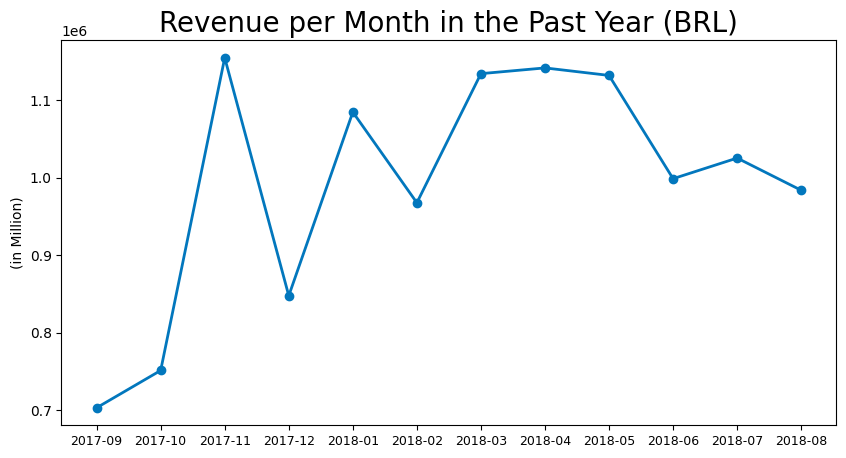

In [78]:
# Visualisasi data revenue penjualan
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"][-13:-1],
    monthly_orders_df["revenue"][-13:-1],
    marker='o',
    linewidth=2,
    color="#0277BD"
)
plt.title("Revenue per Month in the Past Year (BRL)", fontsize=20)
plt.xticks(fontsize=9)
plt.ylabel("(in Million)")
plt.yticks(fontsize=10)
plt.show()

*Diperoleh bahwa **puncak revenue** berada di bulan **November 2017**, serta penurunan revenue pada bulan **Desember 2017**, **Februari 2018**, **Juni 2018**, dan **Agustus 2018***.

### Pertanyaan 2: Bagaimana demografi *customer* dan *seller* yang kita miliki?

Visualisasi data yang digunakan adalah **Bar Chart**

#### Demografi Customer

* Berdasarkan **City**

Data yang divisualisasikan adalah **10 besar customer terbanyak berdasarkan *city***

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\1380816909.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


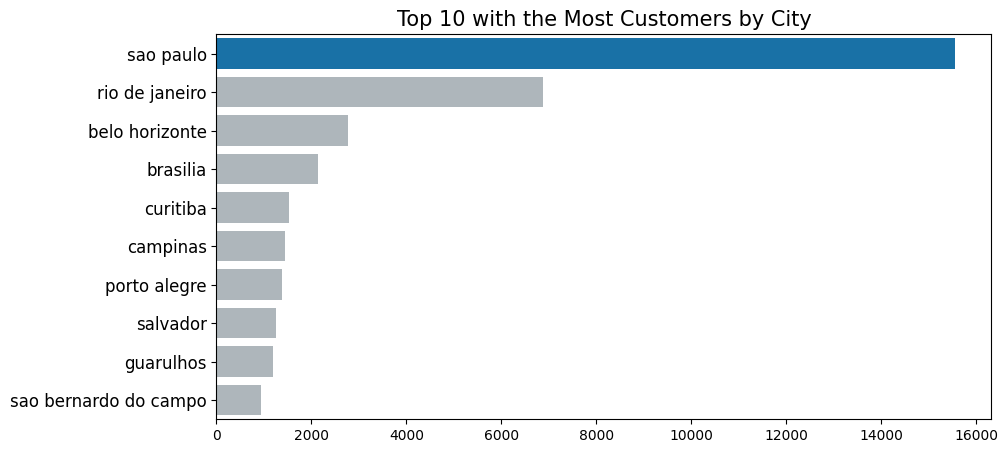

In [79]:
# DataFrame customer_city
customer_city_df = all_df.groupby("customer_city").customer_id.nunique().reset_index()
customer_city_df.rename(columns={
    "customer_id" : "customer_count"
}, inplace=True)

# DataFrame 10 besar
top10_customer_city_df = customer_city_df.sort_values(by="customer_count", ascending=False).head(10)

# Visualisasi data
colors = ["#0277BD", "#ACB7BD", "#ACB7BD", "#ACB7BD", "#ACB7BD", "#ACB7BD", "#ACB7BD", "#ACB7BD", "#ACB7BD", "#ACB7BD"]

plt.figure(figsize=(10,5))
sns.barplot(
    x = "customer_count",
    y = "customer_city",
    data = top10_customer_city_df,
    palette=colors
)
plt.title("Top 10 with the Most Customers by City", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

* Berdasarkan **State**

Data yang divisualisasikan adalah **10 besar customer terbanyak berdasarkan *state***

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\2704133205.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


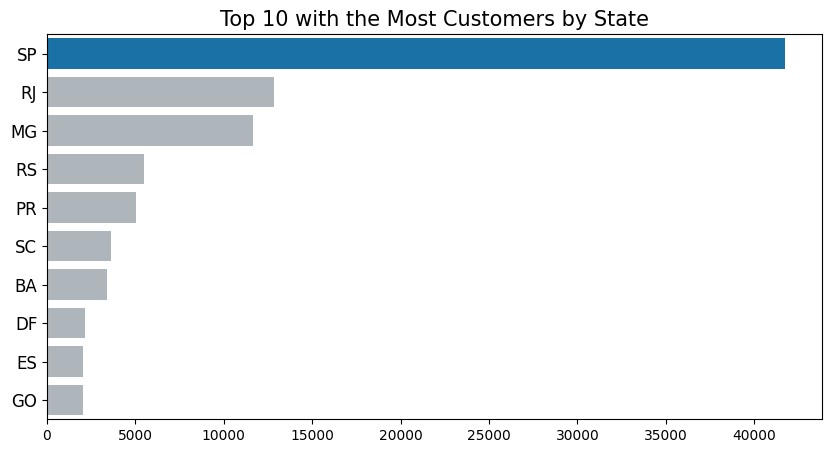

In [80]:
# DataFrame customer_state
customer_state_df = all_df.groupby("customer_state").customer_id.nunique().reset_index()
customer_state_df.rename(columns={
    "customer_id" : "customer_count"
}, inplace=True)

# DataFrame 10 besar
top10_customer_state_df = customer_state_df.sort_values(by="customer_count", ascending=False).head(10)

# Visualisasi data
plt.figure(figsize=(10,5))
sns.barplot(
    x = "customer_count",
    y = "customer_state",
    data = top10_customer_state_df,
    palette=colors
)
plt.title("Top 10 with the Most Customers by State", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

*Didapat bahwa customer terbanyak berada di **Kota Sao Paulo** dan **State SP***.

#### Demografi Seller

* Berdasarkan **City**

Data yang divisualisasikan adalah **10 besar seller terbanyak berdasarkan *city***

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\4291148155.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


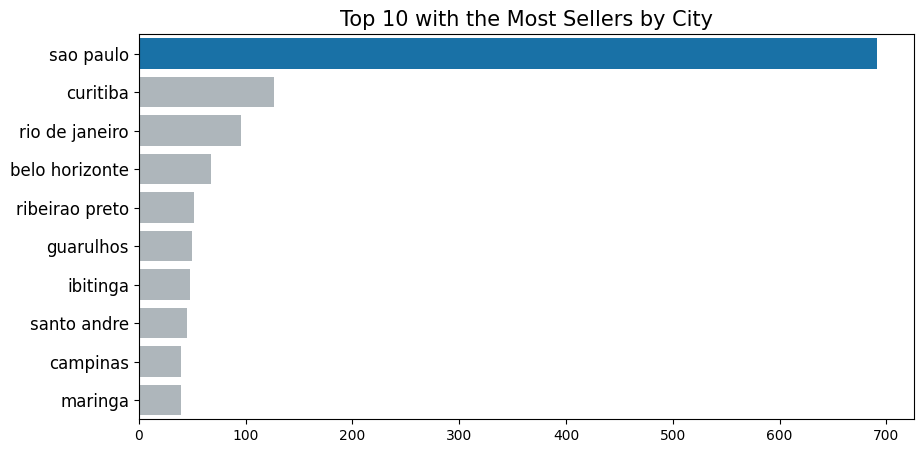

In [81]:
# DataFrame seller_city
seller_city_df = all_df.groupby("seller_city").seller_id.nunique().reset_index()
seller_city_df.rename(columns={
    "seller_id" : "seller_count"
}, inplace=True)

# DataFrame 10 besar
top10_seller_city_df = seller_city_df.sort_values(by="seller_count", ascending=False).head(10)

# Visualisasi data
plt.figure(figsize=(10,5))
sns.barplot(
    x = "seller_count",
    y = "seller_city",
    data = top10_seller_city_df,
    palette=colors
)
plt.title("Top 10 with the Most Sellers by City", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

* Berdasarkan **State**

Data yang divisualisasikan adalah **10 besar seller terbanyak berdasarkan state**.

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\3290655854.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


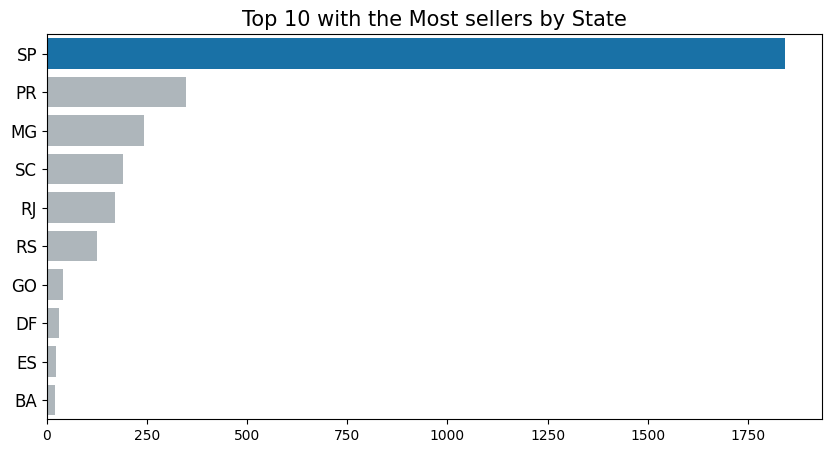

In [82]:
# DataFrame seller_state
seller_state_df = all_df.groupby("seller_state").seller_id.nunique().reset_index()
seller_state_df.rename(columns={
    "seller_id" : "seller_count"
}, inplace=True)

# DataFrame 10 besar
top10_seller_state_df = seller_state_df.sort_values(by="seller_count", ascending=False).head(10)

# Visualisasi data
plt.figure(figsize=(10,5))
sns.barplot(
    x = "seller_count",
    y = "seller_state",
    data = top10_seller_state_df,
    palette=colors
)
plt.title("Top 10 with the Most sellers by State", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

*Sama seperti customer, diperoleh bahwa **Kota** dan **State** dengan **seller terbanyak** adalah **Sao Paulo** dan **SP***.

### Pertanyaan 3: Kategori produk apa yang paling banyak terjual dan paling sedikit terjual?

* Membuat DataFrames kategori produk berdasarkan jumlah penjualan

In [83]:
sum_order_items_df = all_df.query("order_status != 'canceled'").groupby(by="product_category_name").quantity.sum().sort_values(ascending=False).reset_index()
sum_order_items_df

,product_category_name,quantity
0,bed_bath_table,11247.0
1,health_beauty,9787.0
2,sports_leisure,8689.0
3,furniture_decor,8401.0
4,computers_accessories,7807.0
...,...,...
68,portateis_cozinha_e_preparadores_de_alimentos,14.0
69,la_cuisine,14.0
70,pc_gamer,9.0
71,fashion_childrens_clothes,6.0


* Visuaisasi data dalam bentuk **Bar Chart**

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\718236238.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\718236238.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


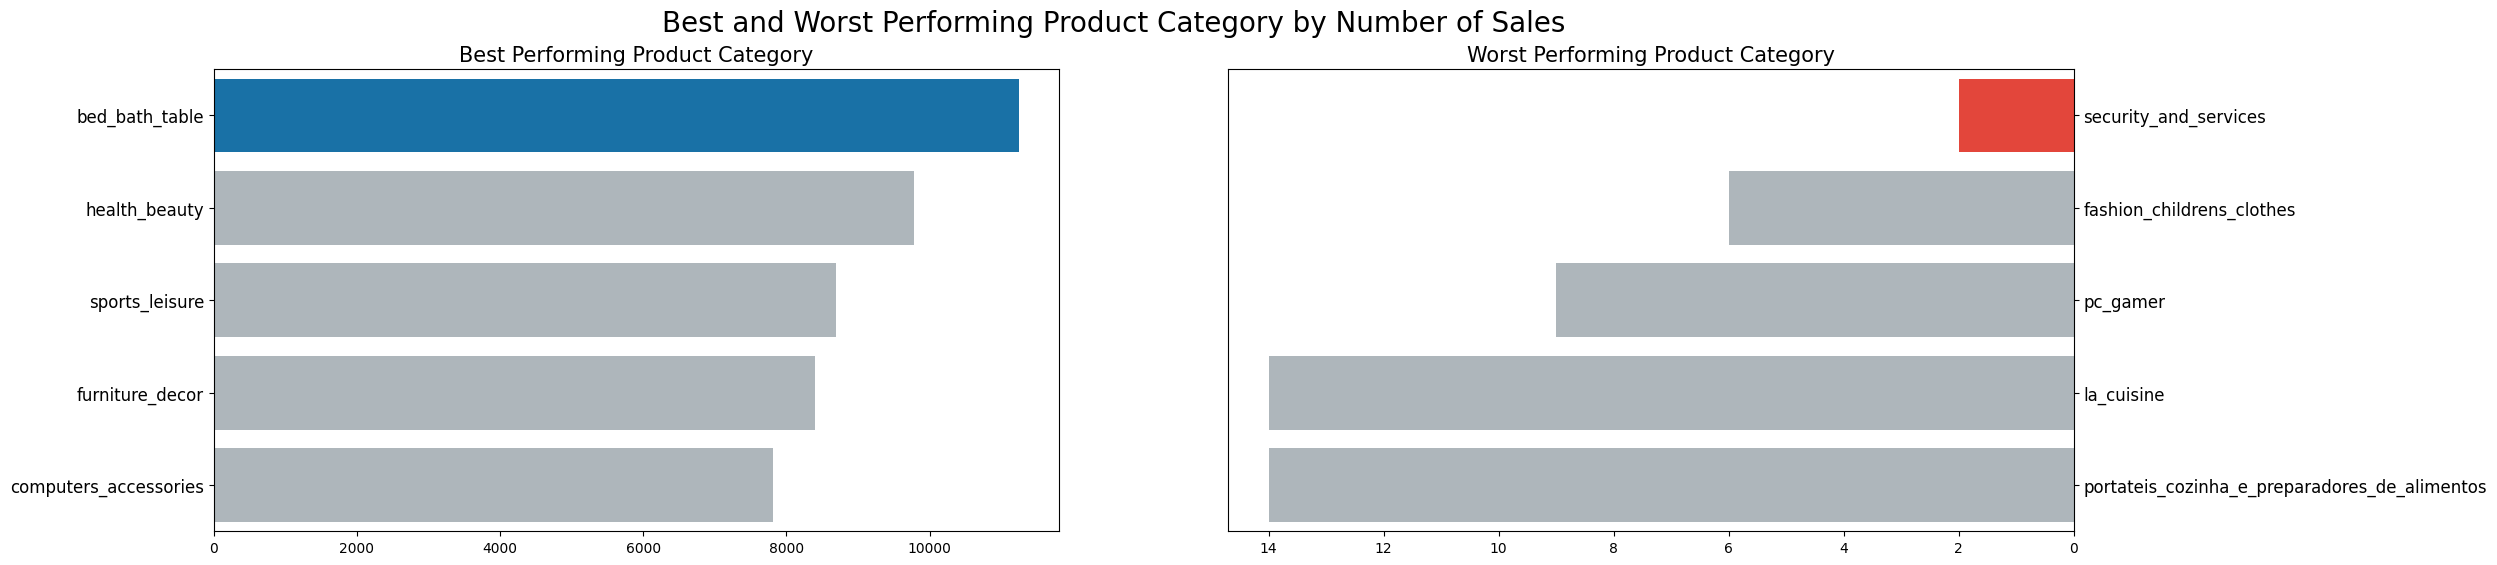

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#0277BD", "#ACB7BD", "#ACB7BD", "#ACB7BD", "#ACB7BD"]
colors_ = ["#FF2E1F", "#ACB7BD", "#ACB7BD", "#ACB7BD", "#ACB7BD"]

sns.barplot(
    x = "quantity",
    y = "product_category_name",
    data = sum_order_items_df.head(5),
    palette = colors,
    ax = ax[0]
)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Best Performing Product Category", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x = "quantity",
    y = "product_category_name",
    data = sum_order_items_df.sort_values(by="quantity", ascending=True).head(5),
    palette = colors_,
    ax = ax[1]
)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product Category", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product Category by Number of Sales", fontsize=20)
plt.show()

*Diperoleh bahwa kategori produk dengan penjualan tertinggi adalah **bed_bath_table** dan penjualan terendah adalah **security_and_services***.

### Pertanyaan 4: Kategori produk apa yang memiliki review terbaik dan terjelek?

* Membuat DataFrame kategori produk berdasarkan review

In [85]:
all_review_df = all_df.query("order_status != 'canceled'").groupby(by="product_category_name").agg({
    "review_score" : "mean"
}).sort_values(by="review_score", ascending=False)
all_review_df.rename(columns={
    "review_score" : "review_average"
}, inplace=True)
all_review_df

,review_average
product_category_name,
cds_dvds_musicals,4.666667
flowers,4.538462
books_general_interest,4.504990
costruction_tools_tools,4.437500
books_technical,4.421260
...,...
fashion_male_clothing,3.763636
office_furniture,3.631369
portateis_cozinha_e_preparadores_de_alimentos,3.615385


* Visualisasi data dalam bentuk **Bar Chart**

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\3050683393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\3050683393.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


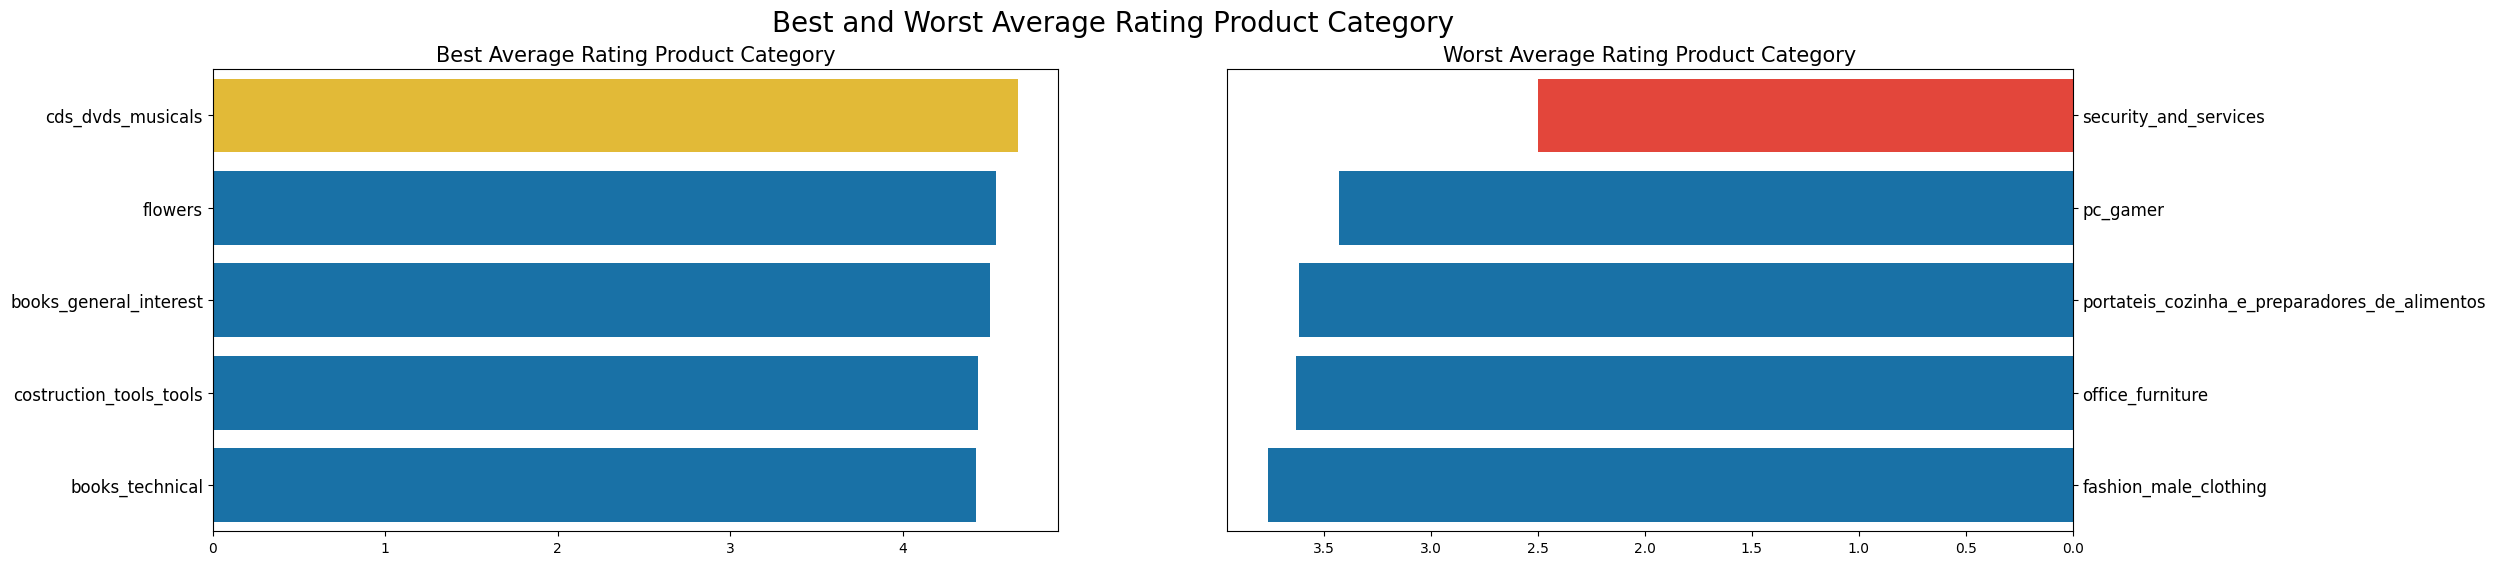

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#FFC91A", "#0277BD", "#0277BD", "#0277BD", "#0277BD"]
colors_ = ["#FF2E1F", "#0277BD", "#0277BD", "#0277BD", "#0277BD"]

sns.barplot(
    x = "review_average",
    y = "product_category_name",
    data = all_review_df.head(5),
    palette = colors,
    ax = ax[0]
)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Best Average Rating Product Category", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x = "review_average",
    y = "product_category_name",
    data = all_review_df.sort_values(by="review_average", ascending=True).head(5),
    palette = colors_,
    ax = ax[1]
)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Average Rating Product Category", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

plt.suptitle("Best and Worst Average Rating Product Category", fontsize=20)
plt.show()

*Diperoleh bahwa kategori produk dengan rata-rata skor review tertinggi adalah **cds_dvds_musicals** dan rata-rata skor review terendah adalah **security_and_services***.

### Pertanyaan 5 dan 6: Seberapa sering pembelian produk tiap state dalam beberapa tahun terakhir? Berapa banyak uang yang dihabiskan tiap state dalam beberapa tahun terakhir?

### RFM Analysis

RFM Analisis kali ini digunakan untuk menjawab pertanyaan 5 dan 6. Pada tahap ini akan dianalisis hanya bagian ***frequency*** dan ***monetary*** di tiap *state*.

* Membuat DataFrame ***rfm_df***

In [93]:
rfm_df = all_df.groupby(by="customer_state", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "quantity": "sum", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["state", "recent_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["recent_order_timestamp"] = rfm_df["recent_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["recent_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("recent_order_timestamp", axis=1, inplace=True)
rfm_df

,state,frequency,monetary,recency
0,AC,92.0,1.906733e+04,57
1,AL,444.0,9.446108e+04,63
2,AM,165.0,2.764330e+04,64
3,AP,82.0,1.615610e+04,62
4,BA,3799.0,5.973438e+05,57
5,CE,1478.0,2.692711e+05,50
6,DF,2406.0,3.462708e+05,50
7,ES,2256.0,3.202881e+05,53
8,GO,2333.0,3.425758e+05,54
9,MA,824.0,1.494329e+05,55


* Visualisasi data dengan **Bar Chart**

C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\2317445317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\2317445317.py:6: UserWarning: The palette list has more values (28) than needed (27), which may not be intended.
  sns.barplot(
C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\2317445317.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\2317445317.py:18: UserWarning: The palette list has more values (28) than needed (27), which may not be intended.
  sns.barplot(
C:\Users\Abdillah\AppData\Local\Temp\ipykernel_7748\2317445317.py:30: FutureWarning: 

Passing `palette`

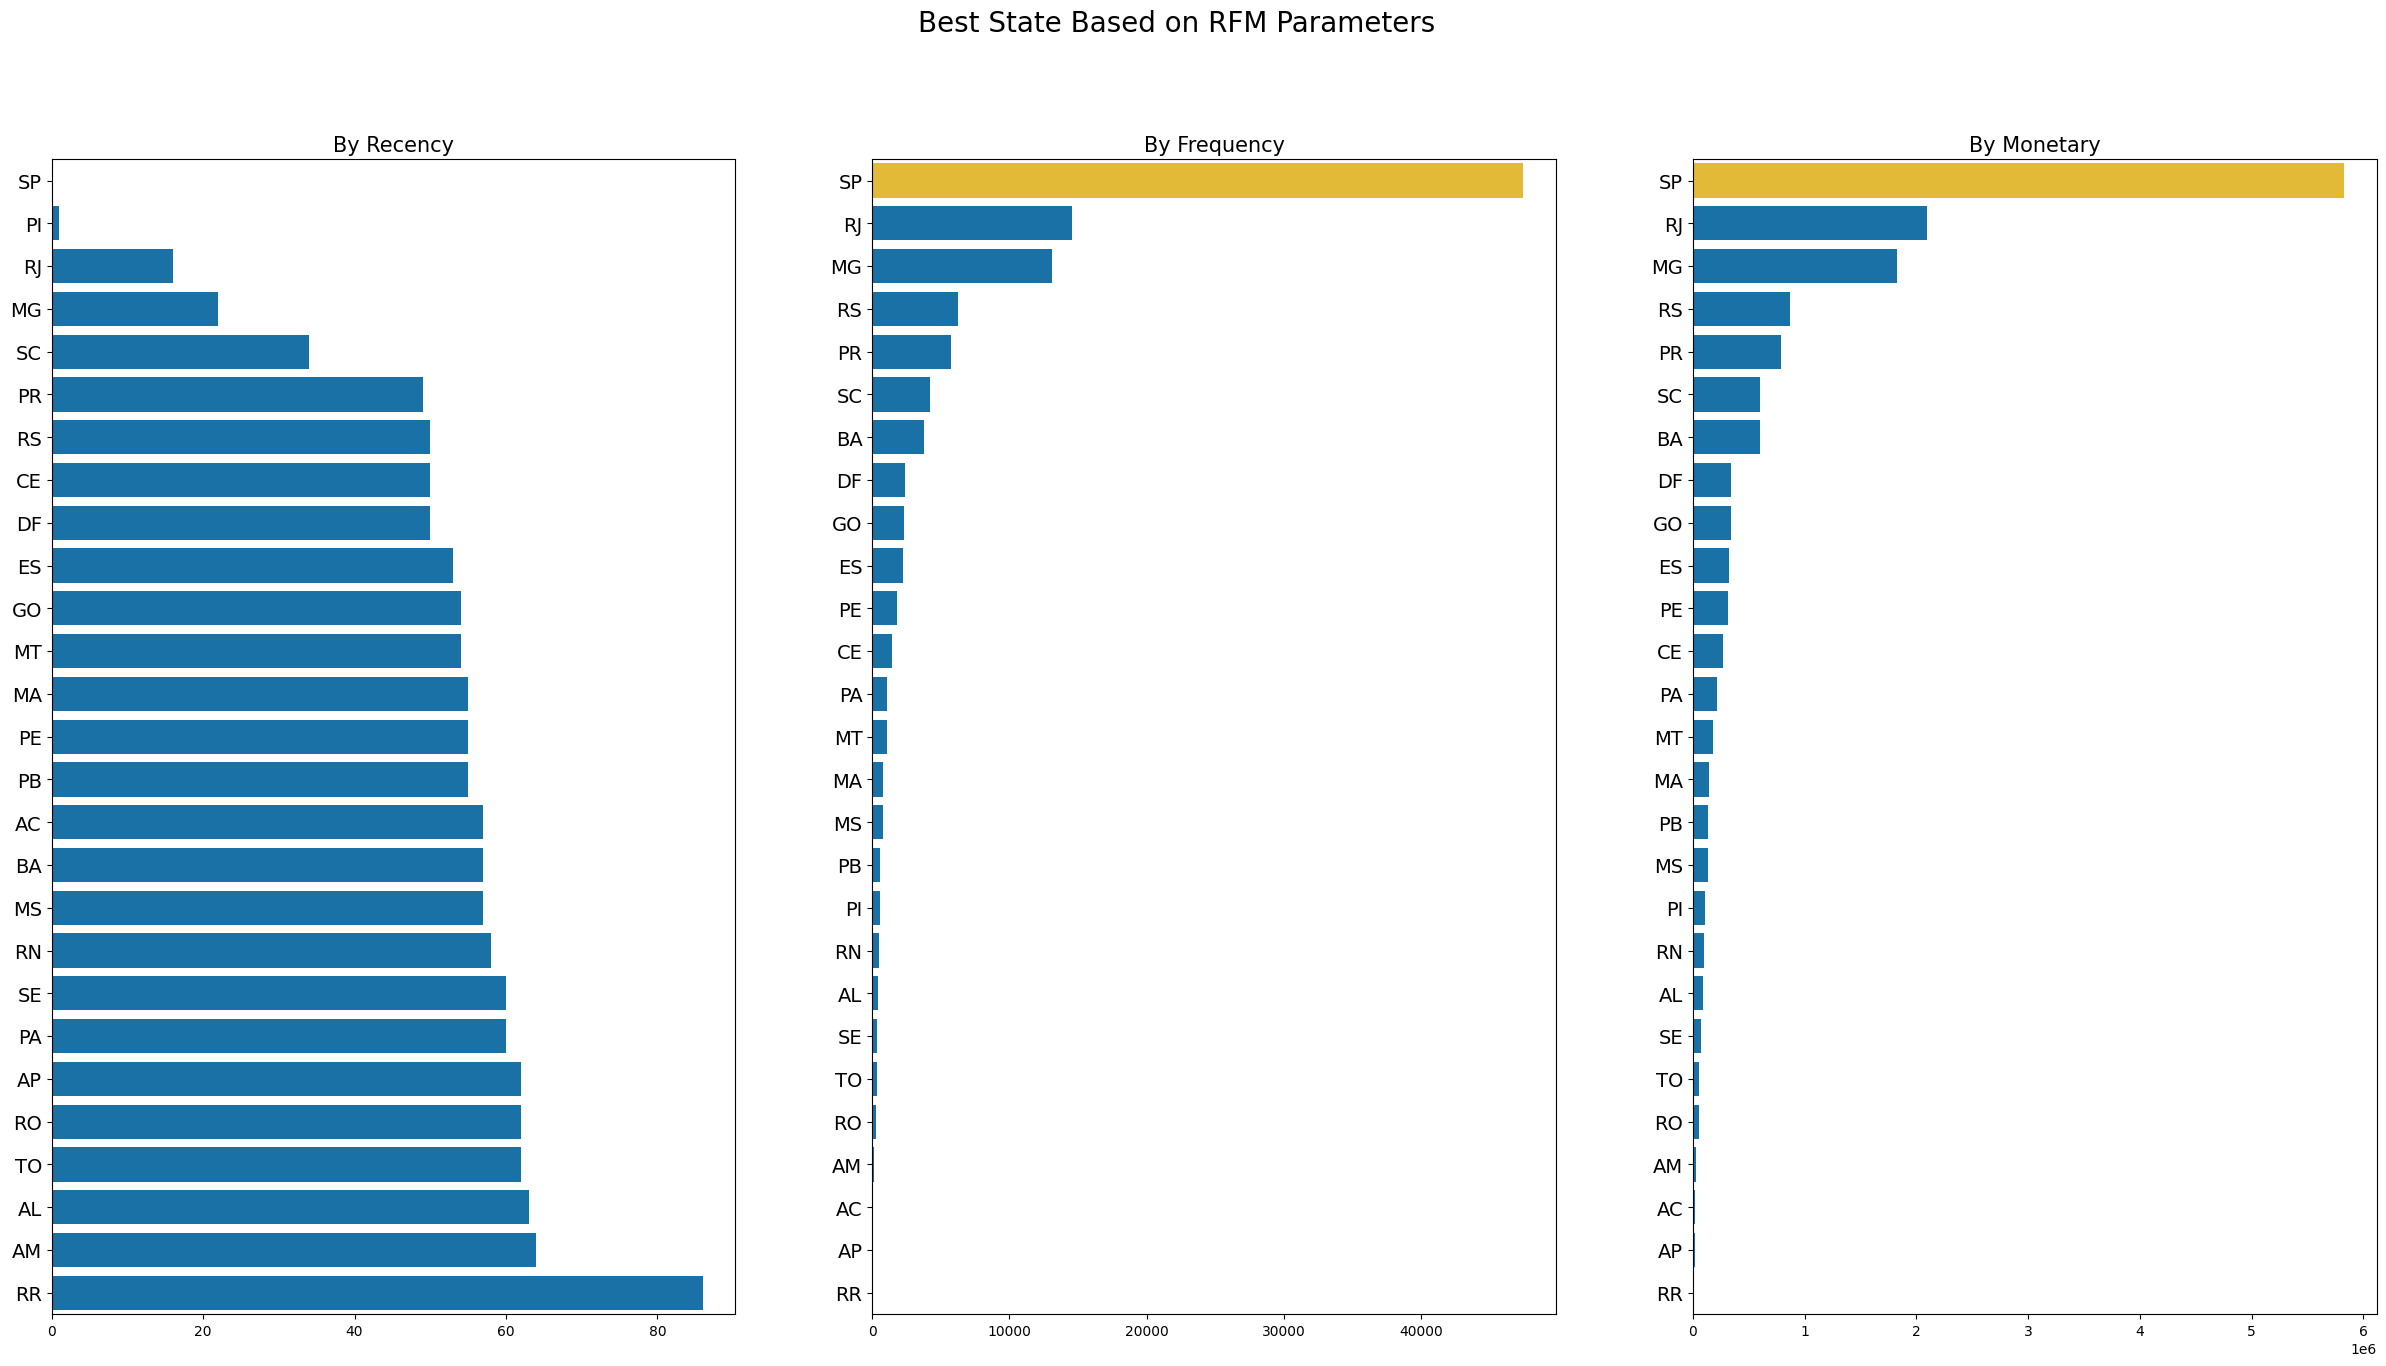

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))
colors = ["#FFC91A", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD",
          "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD",
          "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD", "#0277BD"]

sns.barplot(
    x = "recency",
    y = "state",
    data = rfm_df.sort_values("recency", ascending=True),
    palette = colors,
    ax = ax[0]
)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("By Recency", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=14)

sns.barplot(
    x = "frequency",
    y = "state",
    data = rfm_df.sort_values("frequency", ascending=False),
    palette = colors,
    ax = ax[1]
)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=14)

sns.barplot(
    x = "monetary",
    y = "state",
    data = rfm_df.sort_values("monetary", ascending=False),
    palette = colors,
    ax = ax[2]
)
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis ='y', labelsize=14)

plt.suptitle("Best State Based on RFM Parameters", fontsize=20)
plt.show()

## Conclusion

- Conclusion pertanyaan 1

    Pada penjualan selama satu tahun terakhir (September 2017 - Agustus 2018), *diperoleh bahwa puncak performa penjualan berada di bulan **November 2017** dengan **7.507 orderan**, dan revenue tertinggi juga berada di bulan yang sama dengan **1.154.856 BRL**. Selain itu, performa mengalami penurunan pada bulan **Desember 2017**, **Februari 2018**, **April 2018** dan **Juni 2018** serta penurunan revenue pada bulan **Desember 2017**, **Februari 2018**, **Juni 2018**, dan **Agustus 2018**.*

- Conclusion pertanyaan 2

    Customer tersebar di **27 negara bagian (*state*)** dan **4.119 kota**, dengan jumlah customer terbanyak berada di kota **Sao Paulo** sebanyak **15.540** customer dan negara bagian **Sao Paulo (SP)** sebanyak **41.746** customer. Selain itu, terdapat pula seller yang tersebar di **23 negara bagian (*state*)** dan **611 kota**, dengan jumlah seller terbanyak berada di kota **Sao Paulo** sebanyak **691** seller dan negara bagian **Sao Paulo (SP)** sebanyak **1.843** seller.

- Conclusion pertanyaan 3

    *E-commerce* telah menjual **73 kategori produk**, dengan **penjualan tertinggi** sebanyak **11.247 produk** dari kategori **bed_bath_table**. Selain itu, kategori produk dengan **penjualan terendah** adalah **security_and_services** sebanyak **2 produk**.

- Conclusion pertanyaan 4

    Dari semua produk yang telah terjual, terdapat **97.431 review** dengan **rata-rata rating 4,1**. Diperoleh juga kategori produk dengan **rata-rata rating tertinggi** adalah **cds_dvds_musicals** dengan rating **4,7** dan rata-rata rating terendah adalah **security_and_services** dengan rating **2,5**.

* Conclusion pertanyaan 5

    Dalam beberapa tahun terakhir, rata-rata pembelian produk tiap state adalah **4.172** produk. Pembelian produk didominasi oleh negara bagian **Sao Paulo (SP)** dengan pembelian **47.449** produk, lalu diikuti dengan negara bagian **Rio de Janeiro (RJ)** dan **Minas Gerais (MG)** dengan pembelian masing-masing **14.579** produk dan **13.129** produk.

* Conclusion pertanyaan 6

    Rata-rata uang yang dihabiskan untuk pembelian produk tiap state dalam beberapa tahun terakhir adalah **577.232 BRL**. Negara bagian dengan *total revenue* tertinggi dipegang oleh **Sao Paulo (SP)** dengan *total revenue* **5.827.544 BRL**, kemudian diikuti dengan **Rio de Janeiro (RJ)** dan **Minas Gerais (MG)** dengan *total revenue* masing-masing **2.091.770 BRL** dan **1.828.647 BRL**.

## Ekstrak data ke CSV

In [89]:
all_df.to_csv("all_data.csv", index=False)